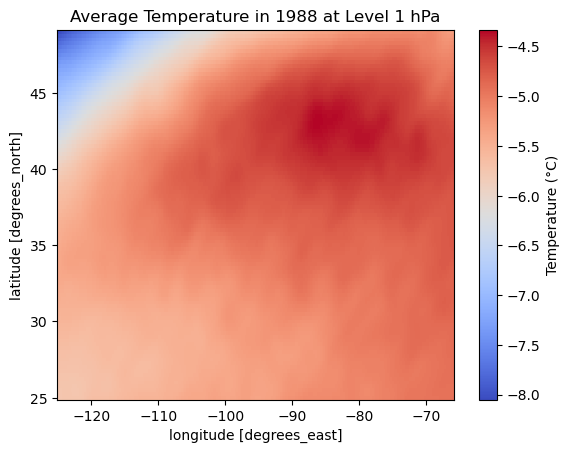

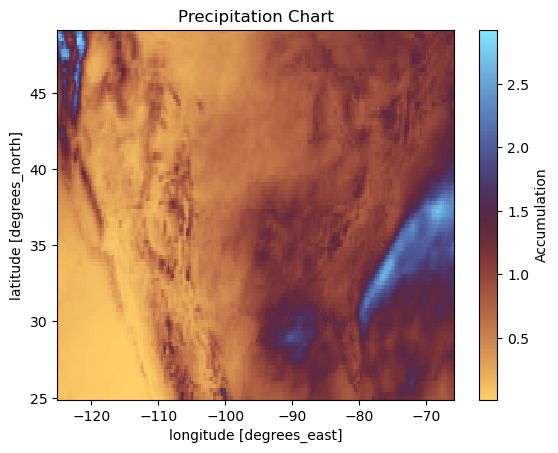

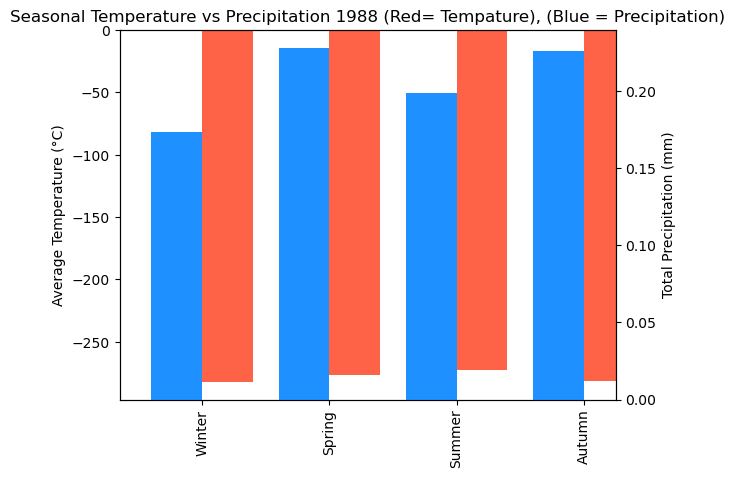

In [53]:
#part 2 plotting
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
#retrive data
temp_data = xr.open_dataset("/Users/jwere/School/era5_temperature_1988.nc")
prec_data = xr.open_dataset("/Users/jwere/School/era5_precipitation_1988.nc")


#select vars 
temp = temp_data['t'].sel(pressure_level=1)
prec = prec_data['tp'].sel(valid_time=slice('1988-01-01', '1988-12-31'))

#convert to celcius
temp = temp - 273.15


#set mean/sum for plotas
temp_mean = temp.mean(dim='valid_time')
prec_sum = prec.sum(dim='valid_time')


  
#plot
temp_mean.plot(cmap='coolwarm',cbar_kwargs={'label': 'Temperature (°C)'})
plt.title("Average Temperature in 1988 at Level 1 hPa")
plt.show()

prec_sum.plot(cmap='managua',cbar_kwargs={"label":"Accumulation"})
plt.title("Precipitation Chart")
#plt.x_axis(
plt.show()



#part 3 comparison
# Combine into a DataFrame for easy plotting
seasons = ['Winter','Spring','Summer','Autumn']
comparison = pd.DataFrame({
    'Temperature_C': temp_season_avg.values,
    'Precipitation_mm': prec_season_total.values
}, index=seasons)

#print(comparison)

ax = comparison['Temperature_C'].plot(kind='bar', color='tomato', position=0, width=0.4)
comparison['Precipitation_mm'].plot(kind='bar', color='dodgerblue', secondary_y=True, position=1, width=0.4, ax=ax)

ax.set_ylabel("Average Temperature (°C)")
ax.right_ax.set_ylabel("Total Precipitation (mm)")
ax.set_title("Seasonal Temperature vs Precipitation 1988 (Red= Tempature), (Blue = Precipitation)")
plt.show()
